<a href="https://colab.research.google.com/github/RamilSI/Test-Calc/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%90%D0%BF%D1%80%D0%B5%D0%BB%D1%8C%D1%81%D0%BA%D0%B8%D0%B9_%D0%BA%D1%83%D1%80%D1%81_(2020)_Light_%D0%97%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D0%B5_30_%D0%9A%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Теоретический материал:* https://youtu.be/N4f_BDEYiNA?t=105

*Разбор данного раздела:* https://youtu.be/N4f_BDEYiNA?t=1778

In [ ]:
# Статический вывод графики (графики отображаются в той ячейке, в которой используется plt.show())
%matplotlib inline

import pandas as pd # импортируем библиотеку обработки и анализа данных pandas
import matplotlib.pyplot as plt # Импортируем модуль pyplot библиотеки matplotlib для построения графиков
from tensorflow.keras import utils # Импортируем модуль utils библиотеки tensorflow.keras для получения OHE-представления
import numpy as np # Импортируем библиотеку numpy
from keras.preprocessing.text import Tokenizer, text_to_word_sequence,tokenizer_from_json 

from sklearn.preprocessing import StandardScaler, LabelEncoder # Импортируем библиотеку StandardScaler и LabelEncoder

from sklearn.preprocessing import StandardScaler # Импортируем библиотеку StandardScaler для получения стандартного распределения набора данных
from sklearn.cluster import KMeans # Импортируем библиотуке KMeans для кластеризации
import time
import seaborn as sns
sns.set_style('darkgrid')

#Загружаем базу


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Кластеризация базы hh

*Разбор данного раздела:* https://youtu.be/N4f_BDEYiNA?t=1819

In [ ]:
fixed_df = pd.read_csv('/content/drive/My Drive/Базы/база hh кластеризация по резюме.csv')  # Читаем данные из загруженной базы

## Содержимое базы


In [ ]:
fixed_df # Отображаем содержимое базы

,"Пол, возраст",ЗП,Ищет работу на должность:,Город,Занятость,График,Опыт (двойное нажатие для полной версии),Последеняя/нынешняя должность,Образование и ВУЗ,Авто
0,"Женщина, 21 год, родилась 26 марта 1998",30 000 руб.,Специалист по поддержке пользователей,"Тимашевск, готова к переезду, готова к команди...","проектная работа, стажировка, частичная занят...","удаленная работа, гибкий график, полный день,...",Опыт работы 4 месяца\n\nОктябрь 2018 — январь ...,Медицинская сестра палатная,"Среднее специальное образование 2018 ГБПОУ ""Ей...",NaN
1,"Мужчина, 23 года, родился 17 января 1996",NaN,Программист,"Воронеж, не готов к переезду, не готов к коман...",полная занятость,полный день,Опыт работы 2 года 9 месяцев\n\nОктябрь 2016 —...,Сервисный инженер,Образование Среднее специальное образование,Имеется собственный автомобиль
2,Мужчина,NaN,Веб-программист,"Мытищи, не готов к переезду, не готов к команд...",полная занятость,полный день,Опыт работы 3 года 1 месяц\n\nЯнварь 2019 — ию...,Web-разработчик,Неоконченное высшее образование 2019 Московски...,NaN
3,"Мужчина, 35 лет, родился 24 октября 1983",50 000 руб.,Аналитик-консультант 1С,"Нижний Новгород, не готов к переезду, готов к ...",полная занятость,"гибкий график, полный день, сменный график",Опыт работы 13 лет 1 месяц\n\nМарт 2016 — по н...,Специалист по планированию производства,Высшее образование 2006 Волго-Вятская академия...,NaN
4,"Мужчина, 28 лет, родился 3 ноября 1990",45 000 руб.,Электромонтер связи,"Москва, м. Отрадное, готов к переезду, готов к...",полная занятость,полный день,Опыт работы 7 лет 8 месяцев\n\nДекабрь 2018 — ...,Инженер,Среднее специальное образование 2011 Колледж с...,NaN
...,...,...,...,...,...,...,...,...,...,...
7773,"Мужчина , 42 года , родился 4 апреля 1977",120 000 руб.,Администратор сайта,"Москва , м. Выхино , не готов к переезду , не...","частичная занятость, проектная работа, полная...","гибкий график, полный день, сменный график, в...",Опыт работы 11 лет 10 месяцев\n\nМарт 2014 — п...,Менеджер по веб-проектам,Высшее образование 2000 Академия Федеральной с...,NaN
7774,"Мужчина , 22 года , родился 30 января 1997",30 000 руб.,Системный администратор,"Санкт-Петербург , м. Гражданский проспект , н...",полная занятость,"сменный график, вахтовый метод, удаленная работа",Опыт работы 9 месяцев\n\nДекабрь 2017 — Июнь ...,Системный администратор,Среднее специальное образование 2018 Колледж м...,NaN
7775,"Мужчина , 31 год , родился 4 марта 1988",35 000 руб.,Программист,"Новочеркасск , не готов к переезду , готов к р...",полная занятость,полный день,Опыт работы 4 года 2 месяца\n\nДекабрь 2012 — ...,Продавец-консультант,Среднее специальное образование 2008 НМК Прогр...,NaN
7776,"Мужчина , 22 года , родился 21 июня 1997",NaN,Младший программист,"Санкт-Петербург , не готов к переезду , не гот...",полная занятость,полный день,Опыт работы 4 месяца\n\nМай 2016 — Август 201...,Младший инженер-программист,Неоконченное высшее образование 2021 Санкт-Пет...,NaN


In [ ]:
# Выводим полную информацию по одной записи из базы
n = 4                                    # Номер записи в базе
for i in range(len(fixed_df.values[n])): # Пробегаем по всем столбцам данных выбранной записи
  print(i, " ", fixed_df.values[n][i])   # Печатаем содержимое очередной ячейки с данными

0   Мужчина, 28 лет, родился 3 ноября 1990
1   45 000 руб.
2   Электромонтер связи
3   Москва, м. Отрадное, готов к переезду, готов к командировкам
4   полная занятость
5   полный день
6   Опыт работы 7 лет 8 месяцев

Декабрь 2018 — июнь 2019 7 месяцев ОАО КОМКОР Москва Информационные технологии, системная интеграция, интернет... Инженер Устранение аварий на линиях связи. Замена и настройка серверного и клиентского оборудования.

Июнь 2011 — июнь 2018 7 лет 1 месяц ПАО МГТС Технический специалист Монтаж и обслуживание СКС (Телефония, интернет, телевидение и видеонаблюдение) Замена и настройка неисправного абонентского оборудования. Обслуживание волоконно-оптических линий связи. Сварка ВОЛС. Сварочный аппарат Fujikura S-12. Работа с измерительными приборами.
    

7   Инженер
8   Среднее специальное образование 2011 Колледж связи №54 Сети связи и системы коммутации, Техник
9   nan


## Парсим базу


In [ ]:
'''
  Функция получения данных о поле
    Входные данные:
      - arg - строка данных (для данной функции передаем первую колонку из таблицы)    
    Функция возвращает:
      - 0 (для женского пола) или 1 (для мужского пола)
'''
def getParameterSex(arg):
  out = 0            # По умолчанию женский пол
  if(arg[0] == "М"): # Если в arg[0] буква М, то в выход записываем 1
    out = 1
  return out         # Возвращаем числовое представление пола

'''
  Функция получения ланных о возрасте
    Входные данные:
      - arg - строка данных (для данной функции передаем первую колонку из таблицы)
    Функция возвращает:
      - возраст (int)
'''
def getParameterAge(arg):
  out = 0                                             # По умолчанию в выход записываем 0
  if (len(arg) > 7):                                  # Если в строке больше 7 символов (значит имеется информация о возрасте)
    index = 0                                         # В index записываем позицию в строке, с которой начинается возраст
    while ((arg[index] != " ") & (index < len(arg))): # Ищем первый пробел во входной строке (далее следует возраст)
      index += 1                                      # Увеличиваем индекс    
    if (index != len(arg)-1):                         # Если index меньше длинны строки
      out = int(arg[index+1:index+3])                 # В out записываем возраст (2 символа после найденного пробела во входной строке)
  return out                                          # Возвращаем возраст

'''
  Функция  получения данных о возрасте по году рождения
    Входные данные:
      - arg - строка данных (для данной функции передаем первую колонку из таблицы)
    Функция возвращает:
      - возраст (int)
'''
def getParameterAge2(arg):
  out = 0                                             # По умолчанию в выход записываем 0
  if (len(arg) > 7):                                  # Если в строке больше 7 символов (значит имеется информация о возрасте)
    ageStr = arg[len(arg)-4:len(arg)]                 # Получаем последние 4 символа во входной строке (год рождения)
    out = 2020 - int(ageStr)                          # Получаем возраст   
  return out                                          # Возвращаем возраст

'''
  Функция получения OHE-представления данных о возрасте
    Входные данные:
      - arg - строка данных (для данной функции передаем первую колонку из таблицы)
    Функция возвращает:
      - OHE представление возраста по 11 классам (list)
'''
def getParameterAgeVect(arg):
  out = getParameterAge2(arg) # Получаем возраст по году рождения 
  outClass = 0                # По умолчанию в out записываем 0

  if (out > 18): # Если старше 19 лет, изменяем out на 1
    outClass = 1
  if (out > 23): # Если старше 23 лет, изменяем out на 2
    outClass = 2
  if (out > 28): # Если старше 28 лет, изменяем out на 3
    outClass = 3
  if (out > 33): # Если старше 33 лет, изменяем out на 4
    outClass = 4
  if (out > 38): # Если старше 38 лет, изменяем out на 5
    outClass = 5
  if (out > 43): # Если старше 43 лет, изменяем out на 6
    outClass = 6
  if (out > 48): # Если старше 48 лет, изменяем out на 7
    outClass = 7
  if (out > 53): # Если старше 53 лет, изменяем out на 8
    outClass = 8 
  if (out > 58): # Если старше 58 лет, изменяем out на 9
    outClass = 9 
  if (out > 63): # Если старше 63 лет, изменяем out на 10
    outClass = 10  
  return list(utils.to_categorical(outClass, 11).astype('int')) # Возвращаем OHE представление возраста по 11 классам

'''
  Функция получения данных о желаемой зарплате
    Входные данные:
      - arg - строка данных (для данной функции передаем вторую колонку из таблицы)
    Функция возвращает:
      - желаемая зарплата (int)
'''
def getParameterSalary(arg):
  out = -1                     # По умолчанию в out записываем -1 (если зарплата не указана)
  if (type(arg) != float):     # Проверяем, чтобы в arg не было float-данных
    index = 0                  # В index запишем позицию последнего пробела во входной строке
    for i in range(len(arg)):  # Пробегаем по всей строке
      if (arg[i]==" "):        # Если очередной символ это пробел
        index = i              # Записываем позицию пробела в index
    salaryStr = ""             # Строкове представление зарплаты
    for i in range(index):     # Пробегаем в цикле от 0 до index (с начала строки до последнего пробела)
      if (i != index-4):       # Если это не пробельный символ в зарплате (в базе зарплата храниться в формате 45 000)
        salaryStr += arg[i]    # Записываем очередной символ в salaryStr
    out = int(salaryStr)       # Преобразуем в int
  return out                   # Возвращаем зарплату

'''
  Функция получения данных о городе проживания
    Входные данные:
      - arg - строка данных (для данной функции передаем четвертую колонку из таблицы)
    Функция возвращает:
      - OHE-представление города проживания по 4 классам
'''
def getParameterSity(arg):
  out = [0, 0, 0, 1]         # По умолчанию город проживания не Москва, не Санкт-Петербург и не миллионник  
  index = 0                  # В индекс запишем позицию символа первой запятой во входной строке
  while (arg[index] != ","): # Пробегаем по всем символам входной строки, пока не встретим запятую
    index += 1               # Увеличиваем index на 1  
  sityStr = arg[:index]      # Записываем в sityStr город прживания    
  millionSities = "Новосибирск Екатеринбург Нижний Новгород Казань Челябинск Омск Самара Ростов-на-Дону Уфа Красноярск Пермь Воронеж Волгоград" # Строка, содержащая города милионники  
  if (sityStr == "Москва"):  # Если город проживания - Москва
    out[0] = 1               # Записываем в 0-позицию 1
    out[3] = 0               # Обнуляем значение out по умолчанию
  if (sityStr == "Санкт-Петербург"): # Если город проживания - Санкт-Петербург
    out[1] = 1               # Записываем в 1-позицию 1
    out[3] = 0               # Обнуляем значение out по умолчанию
  if (sityStr in millionSities): # Если город проживания один из городов милионников
    out[2] = 1               # Записываем во 2-позицию 1
    out[3] = 0               # Обнуляем значение out по умолчанию  
  return out                 # Возвращаем OHE-представление города проживания по 4 классам

'''
  Функция получения данных о желаемых типах занятости
    Входные данные:
      - arg - строка данных (для данной функции передаем пятую колонку из таблицы)
    Функция возвращает:
      - список желаемых типов занятости
'''
def getParameterEmployment(arg):
  out = [0, 0, 0, 0]                 # По умолчанию желаемый тип занятости не указан  
  if ("стажировка" in arg):          # Если во входной строке имеется пункт: стажировка
    out[0] = 1                       # Записываем в 0-позицию 1
  if ("частичная занятость" in arg): # Если во входной строке имеется пункт: частичная занятость
    out[1] = 1                       # Записываем в 1-позицию 1
  if ("проектная работа" in arg):    # Если во входной строке имеется пункт: проектная работа
    out[2] = 1                       # Записываем в 2-позицию 1
  if ("полная занятость" in arg):    # Если во входной строке имеется пункт: полная занятость
    out[3] = 1                       # Записываем в 3-позицию 1
  return out                         # Возвращаем список желаемых типов занятости

'''
  Функция получения данных о желаемых графиках работы
    Входные данные:
      - arg - строка данных (для данной функции передаем шестую колонку из таблицы)
    Функция возвращает:
      - список желаемых графиков работы
'''
def getParameterSchedule(arg):
  out = [0, 0, 0, 0]              # По умолчанию желаемый график не указан  
  if ("гибкий график" in arg):    # Если во входной строке имеется пункт: гибкий график
    out[0] = 1                    # Записываем в 0-позицию 1
  if ("полный день" in arg):      # Если во входной строке имеется пункт: полный день
    out[1] = 1                    # Записываем в 1-позицию 1
  if ("сменный график" in arg):   # Если во входной строке имеется пункт: сменный график
    out[2] = 1                    # Записываем в 2-позицию 1
  if ("удаленная работа" in arg): # Если во входной строке имеется пункт: удаленная работа
    out[3] = 1                    # Записываем в 3-позицию 1  
  return out                      # Возвращаем список желаемых графиков работы

'''
  Функция получения данных об образовании
    Входные данные:
      - arg - строка данных (для данной функции передаем девятую колонку из таблицы)
    Функция возвращает:
      - список с данными об образовании
'''
def getParameterEducation(arg):
  out = [0, 0, 0, 0]                 # По умолчанию образование не указано  
  if ("Высшее" in arg):              # Если во входной строке имеется пункт: Высшее
    out[0] = 1                       # Записываем в 0-позицию 1
  if ("Higher education" in arg):    # Если во входной строке имеется пункт: Higher education
    out[0] = 1                       # Записываем в 0-позицию 1
  if ("Среднее специальное" in arg): # Если во входной строке имеется пункт: Среднее специальное
    out[1] = 1                       # Записываем в 1-позицию 1
  if ("Неоконченное высшее" in arg): # Если во входной строке имеется пункт: Неоконченное высшее
    out[2] = 1                       # Записываем в 2-позицию 1
  if ("Среднее образование" in arg): # Если во входной строке имеется пункт: Среднее образование
    out[3] = 1                       # Записываем в 3-позицию 1  
  return out                         # Возвращаем список с данными об образовании

'''
  Функция получения данных об опыте работы
    Входные данные:
      - arg - строка данных (для данной функции передаем седьмую колонку из таблицы)
    Функция возвращает:
      - стаж работы в месяцах (int)
'''
def getParameterExperience(arg):
  numberStr = ['1','2','3','4','5','6','7','8','9','0'] # Массив цифр в строковом представлении
  out = 0                                               # По умолчанию без опыта работы  
  symbols = 0                                           # В symbols будет храниться количество не пробельных символов

  for s in arg:                                         # Пробегаем по всей входной строке
    if (s != " "):                                      # Если очередной симвло не пробел
      symbols += 1                                      # Увеличиваем symbols на 1   

  if (symbols > 10):                                    # Если имеются еще какие-то данные, помимо строки: опыт работы
    spacesIndexes = []                                  # Список, в который запишем первые 5 пробелов во входной строке
    index = 0                                           # Счетчик символов 
    while ((len(spacesIndexes) < 5) & (index < len(arg))): # Пробегаем по циклу, пока не найдем 5 пробелов или пока не достигнем конца входной строки
      if (arg[index] == " "):                           # Если очередной символ пробел
        spacesIndexes.append(index)                     # Запимшем индекс пробела в spacesIndexes
      index += 1                                        # Увеличиваем счетчик    
    years = 0                                           # Количество отработанных лет
    months = 0                                          # Количество отработынных месяцов
    if (arg[spacesIndexes[2]+1] != "м" and arg[spacesIndexes[2]+1] != "m"): # Если отработал больше 1 года (есть данные о годах)
      if (len(spacesIndexes) >= 3):                     # Если найдено больше 2 пробелов (значит есть данные о годах)
        yearsStr = arg[spacesIndexes[1]+1:spacesIndexes[2]] # Получаем символы между вторым и третьим пробелом из spacesIndexes
        yaerIsNumber = True                             # Флаг того, что количество лет представлено числом
        for s in yearsStr:                              # Пробегаем по всем символам года
          yaerIsNumber = yaerIsNumber and (s in numberStr) # Перезаписываем yaerIsNumber в зависимости от s in numberStr 
        if yaerIsNumber:                                # Если количество лет представлено числом
          years = int(yearsStr)                         # Получаем числовое представление
      if (len(spacesIndexes) >= 5):                     # Если найдено больше 4 пробелов (значит могут быть данные о месцах)
        monthsStr = arg[spacesIndexes[3]+1:spacesIndexes[4]] # Получаем символы между двумя последними пробелами из spacesIndexes
        monthIsNumber = True                            # Флаг того, что количество месяцев представлено числом
        for s in monthsStr:                             # Пробегаем по всем символам мнсяцев
          monthIsNumber = monthIsNumber and (s in numberStr) # Перезаписываем yaerIsNumber в зависимости от s in numberStr 
        if monthIsNumber:
          months = int(monthsStr)                       # Получаем числовое представление
    else:                                               # Если отработал меньше одного года
      if (len(spacesIndexes) >= 3):                     # Если найдено больше 2 пробелов (значит есть данные о месяцах)
        monthsStr = arg[spacesIndexes[1]+1:spacesIndexes[2]] # Получаем символы между вторым и третьим пробелом из spacesIndexes
        months = int(monthsStr)                         # Получаем числовое представление
        
    out = 12*years + months                             # Считаем общий стаж в месяцах  
  return out                                            # Возвращаем стаж работы в месяцах

'''
  Функция получения OHE-представления данных об опыте работы
    Входные данные:
      - arg - строка данных (для данной функции передаем седьмую колонку из таблицы)
    Функция возвращает:
      - OHE представление опыта работы по 11 классам (list)
'''
def getParameterExperienceVector(arg):
  out = getParameterExperience(arg) # Получаем данные об опыте работы
  outClass = 0    # По умолчанию в out записываем 0
  if (out > 6):   # Если опыт работы составляет более 6 месяцев, изменяем out на 1
    outClass = 1
  if (out > 12):  # Если опыт работы составляет более 12 месяцев, изменяем out на 2
    outClass = 2 
  if (out > 24):  # Если опыт работы составляет более 24 месяцев, изменяем out на 3
    outClass = 3
  if (out > 36):  # Если опыт работы составляет более 36 месяцев, изменяем out на 4
    outClass = 4
  if (out > 60):  # Если опыт работы составляет более 60 месяцев, изменяем out на 5
    outClass = 5
  if (out > 96):  # Если опыт работы составляет более 96 месяцев, изменяем out на 6
    outClass = 6
  if (out > 120): # Если опыт работы составляет более 120 месяцев, изменяем out на 7
    outClass = 7
  if (out > 156): # Если опыт работы составляет более 156 месяцев, изменяем out на 8
    outClass = 8
  if (out > 192): # Если опыт работы составляет более 192 месяцев, изменяем out на 9
    outClass = 9 
  if (out > 240): # Если опыт работы составляет более 240 месяцев, изменяем out на 10
    outClass = 10  
  return list(utils.to_categorical(outClass, 11).astype('int')) # Возвращаем OHE-представление данных об опыте работы по 11 классам

'''
  Функция получения полного набора данных по одной записе из базы
    Входные данные:
      - val - запись из базы
    Функция возвращает:
      - массив числовых данных, соответствующий исходной записи
'''
def getAllParameters(val):
  sex = getParameterSex(val[0])               # Получаем пол
  age = getParameterAge2(val[0])              # Получаем возраст
  salary = getParameterSalary(val[1])         # Получаем желаемый уровень зарплаты
  sity = getParameterSity(val[3])             # Получаем город проживания
  employment = getParameterEmployment(val[4]) # Получаем информацию о желаемой занятости
  shedule = getParameterSchedule(val[5])      # Получаем информацию о желаемом графике работы
  education = getParameterEducation(val[8])   # Получаем информацию об образовании
  experience = getParameterExperience(val[6]) # Получаем информацию об опыте работы
  out = []                                    # Создаем пустой список
  out.append(sex)                             # Добавляем данные о поле
  out.append(age)                             # Добавляем данные о возрасте
  out += sity                                 # Добавляем данные о городе проживания
  out += employment                           # Добавляем данные о желаемой занятости
  out += shedule                              # Добавляем данные о желаемом графике работы
  out += education                            # Добавляем данные об образовании
  out.append(experience)                      # Добавляем данные об опыте работы
  out.append(salary)                          # Добавляем данные о желаемом уровне зарплаты  
  return out                                  # Возвращаем сформированный список

'''
  Функция получения обучающей выборки
    Входные данные:
      - values - данные из базы
    Функция возвращает:
      - xTrain, yTrain соответсвующие данным обучающей выборки
'''
def get01Data(values):
  xTrain = []                   # Создаем пустой xTrain
  yTrain = []                   # Создаем пустой yTrain
  
  for val in values:            # Пробегаем по всем записям базы
    y = getParameterSalary(val[1]) # Получаем желаемый уровень зарплаты
    if (y != -1):               # Если есть информация о желаемом уровне (отсеиваем все резюме, где не указана ЗП)
      x = getAllParameters(val) # Получаем полный набор данных о текущей записи val
      xTrain.append(x)          # Добавляем полученные данные в xTrain
      yTrain.append(y/1000)     # Добавялем в yTrain желаемую зарплату (в тыс)
  
  xTrain = np.array(xTrain)     # Переводим в numpy
  yTrain = np.array(yTrain)     # Переводим в numpy
  
  minY = yTrain.min()
  maxY = yTrain.max()
  
  return (xTrain, yTrain)       # Возращаем набор данных

## Простые данные

*Разбор данного раздела:* https://youtu.be/N4f_BDEYiNA?t=1969

In [ ]:
(xTrain01, yTrain) = get01Data(fixed_df.values) # Создаем обучающую выборку по данным из базы

In [ ]:
print(xTrain01.shape) # Выводим размерность xTrain01
print(yTrain.shape)   # Выводим размерность yTrain

(4912, 20)
(4912,)


In [ ]:
# Отобразим данные для конкретной записи
n = 4              # Номер записи
print(xTrain01[n]) # Отобразим xTrain01[n]
print(yTrain[n])   # Отобразим yTrain[n]

[    1    55     0     0     0     1     0     0     0     1     0     1
     0     0     1     0     0     0   230 35000]
35.0


In [ ]:
data01Scaler = StandardScaler()                       # Создаем объект StandardScaler для стандартного распределения
xTrain01Scaled = data01Scaler.fit_transform(xTrain01) # Создаем обучающий набор данных xTrain01Scaled со стандартным распределением на основе xTrain01

In [ ]:
# Отобразим сформированные данные для конкретной записи
n = 4                    # Номер записи 
print(xTrain01Scaled[n]) # Отобразим данные

[ 0.57202173  2.0847134  -0.60149523 -0.34149292 -0.47652879  1.11716378
 -0.24070039 -0.65160875 -0.43116184  0.27054029 -0.68412098  0.35690507
 -0.61720255 -0.67005041  0.66781865 -0.4548402  -0.33476412 -0.19559728
  1.33237315 -0.49972212]


## Простые текстовые данные

*Разбор данного раздела:* https://youtu.be/N4f_BDEYiNA?t=2168

In [ ]:
# Выкачиваем данные по профессиям
def getXTrainTProf(values):
  xTrainTProf = []
  
  for val in values:
    currText = ""
    if (type(val[3]) != float):
      currText += val[2]
    if (type(val[7]) != float):
      currText += " " + val[7]
    
    if (getParameterSalary(val[1]) != -1): # Проверяем, если есть данные о зарплате
      xTrainTProf.append(currText)
  
  xTrainTProf = np.array(xTrainTProf)
  
  return xTrainTProf

### Загружаем простые текстовые данные

In [ ]:
# Вытаскиваем професии для выборки
xTrainTProf = getXTrainTProf(fixed_df.values) 

In [ ]:
print(xTrainTProf[1]) # пример профессии 11го резюме

Аналитик-консультант 1С Специалист по планированию производства


In [ ]:
#################
#Преобразовываем текстовые данные в числовые/векторные для обучения нейросетью
#################

maxWordsCount = 10000 #определяем макс.кол-во слов/индексов, учитываемое при обучении текстов

#для этого воспользуемся встроенной в Keras функцией Tokenizer для разбиения текста и превращения в матрицу числовых значений
tokenizer = Tokenizer(num_words=maxWordsCount, filters='!"#$%&()*+,-–—./:;<=>?@[\\]^_`{|}~\t\n\xa0', lower=True, split=' ', oov_token='unknown', char_level=False)
#выше задаем параметры:
#(num_words=maxWordsCount) - определяем макс.кол-во слов/индексов, учитываемое при обучении текстов
#(filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n') - избавляемся от ненужных символов
#(lower=True) - приводим слова к нижнему регистру
#(split=' ') - разделяем слова по пробелу
#(char_level=False) - просим токенайзер не удалять однобуквенные слова

tokenizer.fit_on_texts(xTrainTProf)         # "Скармливаем" наши тексты, т.е даём в обработку методу, который соберет словарь частотности
items = list(tokenizer.word_index.items())  # Вытаскиваем индексы слов для просмотра

In [ ]:
vocabularyItems = tokenizer.word_index      # Наш словарь
print( 'Фрагмент словаря : {}'.format(list(tokenizer.word_index.items())[:50]))

Фрагмент словаря : [('unknown', 1), ('инженер', 2), ('специалист', 3), ('по', 4), ('менеджер', 5), ('администратор', 6), ('системный', 7), ('руководитель', 8), ('отдела', 9), ('программист', 10), ('ведущий', 11), ('поддержки', 12), ('проектов', 13), ('it', 14), ('технической', 15), ('и', 16), ('оператор', 17), ('проекта', 18), ('начальник', 19), ('разработчик', 20), ('монтажник', 21), ('аналитик', 22), ('интернет', 23), ('директор', 24), ('старший', 25), ('с', 26), ('ит', 27), ('продажам', 28), ('главный', 29), ('технический', 30), ('работе', 31), ('систем', 32), ('помощник', 33), ('консультант', 34), ('техник', 35), ('связи', 36), ('информационных', 37), ('1с', 38), ('клиентами', 39), ('web', 40), ('технологий', 41), ('дизайнер', 42), ('developer', 43), ('заместитель', 44), ('магазина', 45), ('группы', 46), ('manager', 47), ('контент', 48), ('сервисный', 49), ('мастер', 50)]


In [ ]:
# Преобразовываем текст в последовательность индексов согласно частотному словарю
xTrainProfIndexes = tokenizer.texts_to_sequences(xTrainTProf) #Обучающие тексты в индексы

## Создание выборок

*Разбор данного раздела:* https://youtu.be/N4f_BDEYiNA?t=2280

**Подготовка данных**


In [ ]:
# Преобразовываем полученные выборки из последовательности индексов в матрицы нулей и единиц по принципу Bag of Words
xTrainProf01 = tokenizer.sequences_to_matrix(xTrainProfIndexes) # Подаем xTrain в виде списка чтобы метод успешно сработал
print(xTrainProf01.shape)                                       # Размер обучающей выборки, сформированной по Bag of Words
print(xTrainProf01[0][0:100])                                   # Фрагмент набора слов в виде Bag of Words

(4912, 10000)
[0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


## Кластеризация

**Числовые данные**

*Разбор данного раздела:* https://youtu.be/N4f_BDEYiNA?t=2368

In [ ]:
'''
  Функция печати информации о кластере
    Входные данные:
      - x - набор данных
'''
def printCluster(x):
  print("Размер кластера:", x.shape[0]) # Выведем количество элементов в кластере
  
  mX = np.mean(x, axis=0)  # Считаем среднее значение по кластеру
  minX = np.min(x, axis=0) # Находим минимальное значение в кластере
  maxX = np.max(x, axis=0) # Находим максимальное значение в кластере
  stdX = np.std(x, axis=0) # Находим стандартное отклонение элементов кластера

  # Отображаем полученную информацию по указанному кластеру
  print("Пол: ", round(100*mX[0]), "% мужчины", sep="") 
  print("Возраст: ", round(mX[1]), ", разброс: ", round(stdX[1],1), sep="")
  print("Опыт работы: ", round(mX[18]/12,1), ", разброс: ", round(stdX[18]/12,1), sep="")
  print("Зарплата: ", round(mX[19]), ", разброс: ", round(stdX[19],0), sep="")
  
  print("\nТерриториально")
  print("Москва: ", round(100*mX[2]), "%", sep="")
  print("Санкт-Петербург: ", round(100*mX[3]), "%", sep="")
  print("Города миллионники: ", round(100*mX[4]), "%", sep="")
  print("Другие города: ", round(100*mX[5]), "%", sep="")
  
  print("\nТип занятости")
  print("Стажировка: ",  round(100*mX[6]), "%", sep="")
  print("Частичная занятость: ",  round(100*mX[7]), "%", sep="")
  print("Проектная работа: ",  round(100*mX[8]), "%", sep="")
  print("Полная занятость: ",  round(100*mX[9]), "%", sep="")
  
  print("\nГрафик")
  print("Гибкий график: ",  round(100*mX[10]), "%", sep="")
  print("Полный день: ",  round(100*mX[11]), "%", sep="")
  print("Сменный график: ",  round(100*mX[12]), "%", sep="")
  print("Удаленная работа: ",  round(100*mX[13]), "%", sep="")
  
  print("\nОбразование")
  print("Высшее: ",  round(100*mX[14]), "%", sep="")
  print("Среднее специальное: ",  round(100*mX[15]), "%", sep="")
  print("Неоконченное высшее: ",  round(100*mX[16]), "%", sep="")
  print("Среднее образование: ",  round(100*mX[17]), "%", sep="")


In [ ]:
printCluster(xTrain01)  # Выведем информацию о xTrain01

Размер кластера: 4912
Пол: 75% мужчины
Возраст: 34, разброс: 10.2
Опыт работы: 9.7, разброс: 7.1
Зарплата: 61958, разброс: 53946.0

Территориально
Москва: 27%
Санкт-Петербург: 10%
Города миллионники: 19%
Другие города: 44%

Тип занятости
Стажировка: 5%
Частичная занятость: 30%
Проектная работа: 16%
Полная занятость: 93%

График
Гибкий график: 32%
Полный день: 89%
Сменный график: 28%
Удаленная работа: 31%

Образование
Высшее: 69%
Среднее специальное: 17%
Неоконченное высшее: 10%
Среднее образование: 4%


In [ ]:
clustersCount = 10            # Задаем количество кластеров
kmean = KMeans(clustersCount) # Создаем объект KMeans с указанным количеством кластеров
kmean.fit(xTrain01Scaled)     # Произвдим кластеризацию данных xTrain01Scaled
labels = kmean.labels_        # Получаем метки кластеров

In [ ]:
print(labels[:20])            # Выводим первые 20 меток

[1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0]


In [ ]:
clusterNumber = 0                              # Укажем номер кластера
printCluster(xTrain01[labels==clusterNumber,:]) # Выведем информацию о кластере с указанным номером
print('\n\nПрофессии:', xTrainTProf[labels==clusterNumber])

Размер кластера: 3358
Пол: 74% мужчины
Возраст: 34, разброс: 10.2
Опыт работы: 9.8, разброс: 7.3
Зарплата: 64669, разброс: 54774.0

Территориально
Москва: 28%
Санкт-Петербург: 10%
Города миллионники: 18%
Другие города: 44%

Тип занятости
Стажировка: 1%
Частичная занятость: 4%
Проектная работа: 1%
Полная занятость: 97%

График
Гибкий график: 8%
Полный день: 95%
Сменный график: 12%
Удаленная работа: 8%

Образование
Высшее: 69%
Среднее специальное: 18%
Неоконченное высшее: 9%
Среднее образование: 4%


Профессии: ['Аналитик-консультант 1С Специалист по планированию производства'
 'Электромонтер связи Инженер' 'ИТ-специалист Инженер-программист' ...
 'Руководитель Интернет-магазина Руководитель проекта, Интернет-магазин'
 'Программист Продавец-консультант'
 'Системный администратор Системный администратор']


In [ ]:
n_clusters = 30               # Зададим количество кластеров
cost = []                     # Создаем пустой список
for i in range(1,n_clusters): # Пробегаем по списку от 1 до n_clusters
  kmean = KMeans(i)           # Создаем объект KMeans с i-классами
  kmean.fit(xTrain01Scaled)   # Проводим классетризацию xTrain01Scaled
  cost.append(kmean.inertia_) # Добавляем в cost элемент kmean.inertia_
  
# inertia_ - это среднее растояние от точек до центров их классов
# Может использоваться для подбора оптимального количества классов 

# Отобразим значения списка cost на графике
plt.plot(cost, 'bx-')
plt.show()

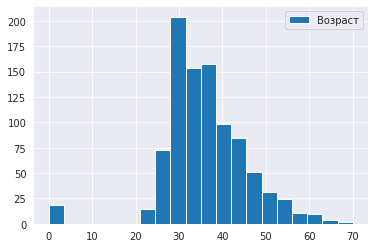

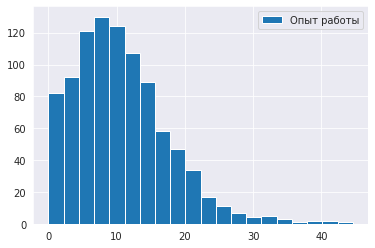

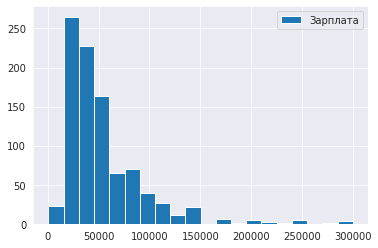

In [ ]:
clusterNumber = 0                           # Зададим номер кластера
cluster = xTrain01[labels==clusterNumber,:] # Получим из xTrain01 данные для указанного кластера
ages = cluster[:,1]                         # Получим все возраста в указанном кластере
exp = cluster[:,18] / 12                    # Получим все данные об опыте работы в указанном кластере
salary = cluster[:,19]                      # Получим все данные о желаемой зарплате в указанном кластере

# Отобразим полученные данные на графиках
plt.hist(ages,20, label="Возраст")
plt.legend()
plt.show()
plt.hist(exp,20, label="Опыт работы")
plt.legend()
plt.show()
plt.hist(salary,20, label="Зарплата")
plt.legend()
plt.show()

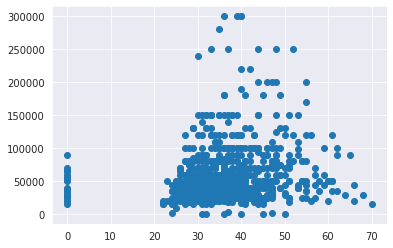

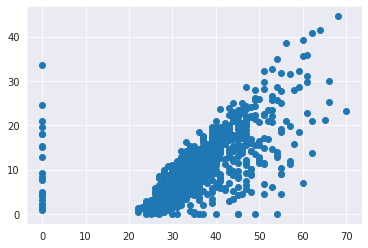

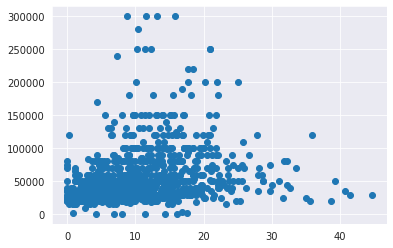

In [ ]:
plt.scatter(ages, salary)
plt.show()

plt.scatter(ages, exp)
plt.show()

plt.scatter(exp, salary)
plt.show()

**По специальности**

*Разбор данного раздела:* https://youtu.be/N4f_BDEYiNA?t=4003

In [ ]:
clustersCount = 100           # Задаем количество кластеров
kmean = KMeans(clustersCount) # Создаем объект KMeans на clustersCount-классов
kmean.fit(xTrainProf01)       # Производим кластеризацию xTrainProf01
labelsProf = kmean.labels_    # Получаем список меток

In [ ]:
# Функция определяет ключевые слова в кластере
def printProfCluster(x, bias, vocabulary):
  mask = np.mean(x, axis=0) > bias # Создаем маску для набора x, среднии значения которого больше bias
  mX = np.mean(x, axis=0)*100      # Получаем среднее значение для набора данных x
  words = ""                       # Создаем пустую строку
  
  for w in vocabulary:            # Проходим по всем элементам словаря
    index = vocabulary[w]         # Считываем значение очередного элемента
    if (index < mask.shape[0]):   # Если значение меньше размерности списка-маски
      if (mask[index]):           # Если в массиве-маске есть само значение
        val = round(mX[index])    # Получаем значение в процентах
        words += w + " " + str(val) + "%" + "\n" # Формируем строку вывода
  
  print(words)                    # Выводим все найденные слова

In [ ]:
clusterNumber = 5                                                               # Указываем номер кластера
print("Размер кластера", sum(labelsProf==clusterNumber))                          # Выводим размер кластера
printProfCluster(xTrainProf01[labelsProf==clusterNumber,:], 0.5, vocabularyItems) # Получаем информацию по ключевым словам класетра

profs = xTrainTProf[labelsProf==clusterNumber]                                    # Получаем записи об указанном кластера
for p in profs:                                                                   # Выводим всю текстовую информацию в данном кластере
  print(p)

Размер кластера 14
по 100%
менеджер 64%
развитию 100%
бизнеса 100%

менеджер по развитию Менеджер по развитию бизнеса
Менеджер проекта Менеджер по развитию бизнеса департамента международного консалтинга
Менеджер проектов Директор по развитию бизнеса
Менеджер проектов по развитию бизнеса Менеджер по управлению бизнес-потребностями
Менеджер по развитию бизнеса Руководитель по развитию интернет-бизнеса
Руководитель проекта Директор по развитию бизнеса
Менеджер по развитию бизнеса (зарубежное направление) Менеджер по ВЭД
Коммерческий директор, Директор по развитию бизнеса (руководитель по развитию) Руководитель проектов (Управление развития удаленных каналов)
Руководитель проектов Менеджер по развитию бизнеса
Контент-редактор Руководитель по развитию бизнеса
Product Manager / Менеджер продукта / Менеджер по развитию бизнеса Product manager
Менеджер по развитию бизнеса Менеджер по развитию бизнеса
Руководитель по развитию бизнеса/ключевых проектов Заместитель директора по работе с ключевым

In [ ]:
for clusterNumber in range(100):                                                    # Пробегаем в цикле от 0 до 100 
  print("Размер кластера", sum(labelsProf==clusterNumber))                          # Печатаем размер очередного кластера
  printProfCluster(xTrainProf01[labelsProf==clusterNumber,:], 0.5, vocabularyItems) # Получаем информацию по ключевым словам очередного кластера
  print()
  print()

Размер кластера 18
администратор 89%
данных 100%
баз 100%



Размер кластера 7
секретарь 100%



Размер кластера 5
инженер 100%
администратор 100%
системный 80%
поддержки 60%
технической 60%
системотехник 80%



Размер кластера 82
специалист 98%
по 100%



Размер кластера 228



Размер кластера 14
по 100%
менеджер 64%
развитию 100%
бизнеса 100%



Размер кластера 55
консультант 100%
продавец 55%



Размер кластера 335
администратор 100%
системный 90%



Размер кластера 11
по 100%
менеджер 55%
продажам 91%
консультант 100%



Размер кластера 26
инженер 96%
категории 85%
1 77%



Размер кластера 137
оператор 100%



Размер кластера 7
специалист 100%
по 100%
отдела 86%
и 100%
информационных 86%
технологий 71%



Размер кластера 4
специалист 75%
поддержки 100%
технической 75%
помощник 100%



Размер кластера 46
программист 100%
1с 100%



Размер кластера 96
инженер 100%
ведущий 100%



Размер кластера 144
специалист 100%



Размер кластера 123
монтажник 100%



Размер кластера 31
специалис

Разбиение на 10 кластеров готово
Разбиение на 20 кластеров готово
Разбиение на 30 кластеров готово
Разбиение на 40 кластеров готово
Разбиение на 50 кластеров готово
Разбиение на 60 кластеров готово
Разбиение на 70 кластеров готово
Разбиение на 80 кластеров готово
Разбиение на 90 кластеров готово
Разбиение на 100 кластеров готово
Разбиение на 110 кластеров готово
Разбиение на 120 кластеров готово
Разбиение на 130 кластеров готово
Разбиение на 140 кластеров готово
Разбиение на 150 кластеров готово
Разбиение на 160 кластеров готово
Разбиение на 170 кластеров готово
Разбиение на 180 кластеров готово
Разбиение на 190 кластеров готово
Время обработки:  5491.88 c


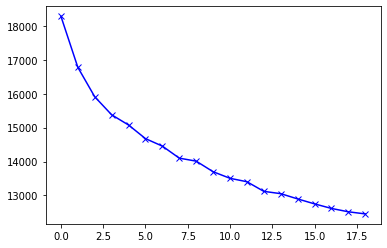

In [ ]:
import time
cur_time = time.time()
# Отобразим график разбияния на различное количество классов
cost = []
for i in range(1,20):
  print("Разбиение на ", i*10, " кластеров готово", sep="")
  kmean = KMeans(i*10)
  kmean.fit(xTrainProf01)
  cost.append(kmean.inertia_)
    
plt.plot(cost, 'bx-')
print('Время обработки: ', round(time.time()-cur_time,2),'c');

# Кластеризация корзин интернет-магазина

*Разбор данного раздела:* https://youtu.be/N4f_BDEYiNA?t=4791

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Базы/online_carts.csv') # Читаем данные из загруженной базы

In [ ]:
df.head()

,Unnamed: 0,Валовая прибыль,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,Период: Февраль 2019 г. - Август 2019 г.,NaN,NaN,NaN
1,NaN,Показатели: Стоимость продажи (руб.)(С НДС),Количество(Базовых ед.),NaN,NaN
2,NaN,Группировки строк: ЗаказПокупателя.Дата оправк...,ЗаказПокупателя.ID заказа (Элементы),Номенклатура.Наименование (Элементы),NaN
3,NaN,Отборы:\nПодразделение В списке (estel.m-cosme...,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Посмотрим на уникальные значения каждого из безымянных столбцов
print(df['Unnamed: 0'].unique(),
      df['Unnamed: 2'].unique(),
      df['Unnamed: 3'].unique(),sep='\n')

[nan]
[nan ' Количество(Базовых ед.)' ' ЗаказПокупателя.ID заказа (Элементы)'
 ... '3472' '7616' '2731']
[nan ' Номенклатура.Наименование (Элементы)' 'Количество' 'Базовых ед.'
 '9' '1' '4' '797' '162' '3' '2' '5' '7' '8' '6' '49' '10' '34' '11' '25'
 '20' '13' '17' '29' '1130' '148' '12' '40' '14' '50' '68' '51' '23' '22'
 '16' '1096' '105' '124' '139' '19' '15' '26' '30' '21' '504' '28' '575'
 '60' '61' '18' '80' '942' '44' '188' '24' '1375' '147' '137' '33' '597'
 '82' '37' '860' '47' '825' '27' '45' '229' '887' '113' '58' '104' '38'
 '1751' '134' '138' '1214' '341' '168' '81' '88' '1074' '150' '32' '52'
 '43' '1023' '64' '72' '31' '39' '1237' '254' '46' '289' '1938' '456'
 '132' '2689' '599' '1771' '181' '322' '77' '556' '90' '256' '42' '57'
 '35' '883' '118' '1078' '145' '2749' '36' '1360' '85' '893' '214' '692'
 '119' '1533' '239' '650' '93' '70' '1551' '158' '78' '102' '780' '291'
 '41' '1278' '140' '48' '161' '1127' '122' '94' '978' '98' '769' '92'
 '159' '720' '69' '56' '1648'

In [ ]:
new = df.drop(['Unnamed: 0'], axis =1)                             # Этот столбец не несет никакой информации, так что выкинем его
new.insert(0, column='Дата', value = [x for x in range(len(new))]) # Вставим новую колонку "Дата", чтобы из базы вытащить временные данные в отдельную колонку
new = new.fillna('unknown')                                        # Все Nan заполним строкой "unknown", чтобы не выскакивало ошибок

In [ ]:
new[new['Валовая прибыль'].str.contains("MCOSM")] # MCOSM - флаг начала корзины

,Дата,Валовая прибыль,Unnamed: 2,Unnamed: 3,Unnamed: 4
10,10,MCOSM13113,26236,9,unknown
22,22,MCOSM13113,1929,4,unknown
166,166,MCOSM4885,350,2,unknown
168,168,MCOSM4996,9436,4,unknown
172,172,MCOSM5963,8625,6,unknown
...,...,...,...,...,...
99589,99589,MCOSM33527,2714,6,unknown
99596,99596,MCOSM33529,3145,9,unknown
99603,99603,MCOSM33530,3030,12,unknown
99616,99616,MCOSM33537,2259,2,unknown


In [ ]:
date_list = list(new[new['Валовая прибыль'].str.contains("\d\d.\d\d.2019")].index) # Здесь будут лежать все индексы строк, где есть информация в формате даты

indx=0
for i in range(len(new)):                       # Проходимся по каждой строке базы
  if i in date_list:                            # Если индекс находится среди тех, где есть формат даты
    indx = i                                    # Обновляем текущий индекс
  new['Дата'][i] = new['Валовая прибыль'][indx] # Присваиваем текущий индекс всем последующим строкам, пока не наткнемся на новый индекс-дату


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
new

,Дата,Валовая прибыль,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Период: Февраль 2019 г. - Август 2019 г.,Период: Февраль 2019 г. - Август 2019 г.,unknown,unknown,unknown
1,Период: Февраль 2019 г. - Август 2019 г.,Показатели: Стоимость продажи (руб.)(С НДС),Количество(Базовых ед.),unknown,unknown
2,Период: Февраль 2019 г. - Август 2019 г.,Группировки строк: ЗаказПокупателя.Дата оправк...,ЗаказПокупателя.ID заказа (Элементы),Номенклатура.Наименование (Элементы),unknown
3,Период: Февраль 2019 г. - Август 2019 г.,Отборы:\nПодразделение В списке (estel.m-cosme...,unknown,unknown,unknown
4,Период: Февраль 2019 г. - Август 2019 г.,unknown,unknown,unknown,unknown
...,...,...,...,...,...
99627,02.09.2019 0:00:00,Kapous Блеск-шампунь Brilliants gloss 250 мл,347,1,unknown
99628,02.09.2019 0:00:00,Крем-бальзам-архитектор волос для восстановле...,345,1,unknown
99629,02.09.2019 0:00:00,Услуга доставки DPD до двери,350,1,unknown
99630,02.09.2019 0:00:00,Шампунь разглаживающий с глиоксиловой кислот...,304,1,unknown


In [ ]:
new = new.drop(new[new['Дата'].str.contains('Период')].index,axis = 0)           # Выкинем превьюшные строки
new = new.drop(new[new['Валовая прибыль'].str.contains('unknown')].index,axis=0) # Выкинем пустые строки между корзинами
new = new.drop(new[new['Валовая прибыль']==new['Дата']].index)                   # Выкинем строки-даты, которые находятся в столбце корзин
new.reset_index(inplace=True)                                                    # Обновим индекс
new = new.drop('index',axis=1)                                                   # Выкинем ненужную, образовавшуюся после предыдущей операции колонку

In [ ]:
cart_list = list(new[new['Валовая прибыль'].str.contains("MCOSM")].index)        # Здесь будут лежать все индексы строк, где строка содержит флаг начала корзины
cafre_list = list(new[new['Валовая прибыль'].str.contains("CAFRE")].index)       # Здесь будут лежать все индексы строк, где строка содержит флаг CAFRE 

Взглянем на распаршенную базу

In [ ]:
new.head(11)

,Дата,Валовая прибыль,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,01.01.2019 0:00:00,MCOSM13113,26236,9,unknown
1,01.01.2019 0:00:00,CONTURA (HS61) машинка для стрижки волос,9059,1,unknown
2,01.01.2019 0:00:00,Holika Holika Универсальный гель 99% алоэ вера...,539,1,unknown
3,01.01.2019 0:00:00,Kapous Бальзам-уход для придания объема Volume...,181,1,unknown
4,01.01.2019 0:00:00,Kapous Шампунь для придания объема Volume up 3...,181,1,unknown
5,01.01.2019 0:00:00,XPERT (HS71) машинка для стрижки волос,12989,1,unknown
6,01.01.2019 0:00:00,ЛП ТНА САВАЖ ПАНАШ 250 мл,988,1,unknown
7,01.01.2019 0:00:00,перчатки (50 пар) винил размер S черные,319,1,unknown
8,01.01.2019 0:00:00,Услуга доставки DPD до двери,990,1,unknown
9,01.01.2019 0:00:00,Услуга доставки СДЭК,990,1,unknown


In [ ]:
carts = []                     # Здесь будут лежать все корзины 
cart=[]                        # В этом списке будет текущая корзина
i=0                            # Счетчик для прохождения по базе
val = new['Валовая прибыль']   # Будем работать с этим столбцом
allPositions = []              # Создаем пустой список позиций

while i!=len(new):             # Пока не дойдем до конца списка

  if i in cart_list:           # Если счетчик в списке индексов-корзин

    if i!=cart_list[-1]:       # Проверяем, если это не последний индекс-флаг
      ind = cart_list.index(i) # Текущему индексу-флагу присваиваем значение конкретно этой корзины

      # Пробегаемся дальше по счетчику до момента, когда он не будет равен следующему в списке индексу-флагу
      # Если условия соблюдаются, то закидываем следующую строку в текущую корзину
      # Инкремент счетчика
      while i<cart_list[ind+1]-1:
        cart.append(val[i+1])
        allPositions.append(val[i+1]) 
        i+=1 
      
    else:                      # Если же текущий индекс-флаг последний в списке

      # Пробегаемся дальше по счетчику до момента, когда он не будет равен концу списка всех строк в столбце-1
      # Если условия соблюдаются, то закидываем следующую строку в текущую корзину
      # Инкремент счетчика
      while i<(len(new)-1):
        cart.append(val[i+1])
        allPositions.append(val[i+1]) 
        i+=1

    carts.append(cart)         # Закидываем корзину в список всех корзин
    cart=[]                    # Очищаем корзину
    
  else:
    i+=1                       # Если счетчик не в списке корзин, то инкрементируем
 


In [ ]:
len(cart_list)

13567

In [ ]:
print(len(carts)==len(cart_list))   # Проверка, если у нас количество корзин совпадает с количеством флагов корзин
print('Количество всех позиций: ', len(allPositions)) 
print('Пример того, что лежит в корзине: ', carts[0])

True
Количество всех позиций:  85617
Пример того, что лежит в корзине:  ['CONTURA (HS61) машинка для стрижки волос', 'Holika Holika Универсальный гель 99% алоэ вера, 250 мл', 'Kapous Бальзам-уход для придания объема Volume up 350 мл', 'Kapous Шампунь для придания объема Volume up 350 мл', 'XPERT (HS71) машинка для стрижки волос', 'ЛП ТНА САВАЖ ПАНАШ 250 мл', 'перчатки (50 пар) винил размер S черные', 'Услуга доставки DPD до двери', 'Услуга доставки СДЭК']


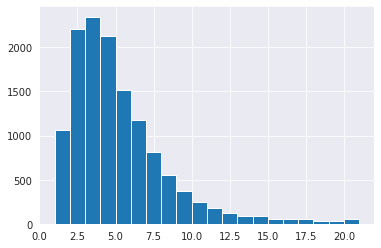

In [ ]:
# Отобразим гистограмму размеров корзин
plt.hist([len(c) for c in carts], 20, [1, 21])
plt.show()

In [ ]:
labelEncoder = LabelEncoder()  # Создаем объект LabelEncoder 
labelEncoder.fit(allPositions) # Обрабатываем все имеющиеся позиции товаров

LabelEncoder()

In [ ]:
maxPositionsCount = max(labelEncoder.transform(allPositions))+1 # Посчитаем количество уникальных товаров
print(maxPositionsCount)                                        # Отобразим это количество

6663


In [ ]:
cartsIndexes = [labelEncoder.transform(c) for c in carts] # Создаем список индексов для каждой корзины

In [ ]:
n = 0                  # Укажем номер корзины
print(carts[n])        # Отобразим содержимое этой корзины
print(cartsIndexes[n]) # Отобразим соответствующие индексы

['CONTURA (HS61) машинка для стрижки волос', 'Holika Holika Универсальный гель 99% алоэ вера, 250 мл', 'Kapous Бальзам-уход для придания объема Volume up 350 мл', 'Kapous Шампунь для придания объема Volume up 350 мл', 'XPERT (HS71) машинка для стрижки волос', 'ЛП ТНА САВАЖ ПАНАШ 250 мл', 'перчатки (50 пар) винил размер S черные', 'Услуга доставки DPD до двери', 'Услуга доставки СДЭК']
[1503 1732 1804 1987 2962 4226 6274 5656 5660]


In [ ]:
'''
  Функция преобразования вектора по приницпу bag of words
    Входные параметры:
      - trainVector - исходный вектор индексов слов
      - wordsCount - установленная длинна вектора
    Функция возращает: 
      - сформированный вектор из 0 и 1
'''
def changeXTo01(trainVector, wordsCount):
  out = np.zeros(wordsCount)                   # Создаем вектор из нулей длинной wordsCount
  for x in trainVector:                        # Пробегаем по всем индексам в trainVector
    out[x] = 1                                 # Изменяем на 1 значение out в позиции текущего индекса 
  return out                                   # Возвращаем сформированный вектор


'''
  Функция преобразования выборки (обучающей или проверочной) по принципе Bag of words
    Входные параметры:
      - trainSet - выборка
      - wordsCount - установленная длинна вектора
    Функция возращает: 
      - сформированная выборка из 0 и 1
'''
def changeSetTo01(trainSet, wordsCount):
  out = []                                     # Создаем пустой список  
  for x in trainSet:                           # Пробегаем по всем элемента выборки
    out.append(changeXTo01(x, wordsCount))     # Получаем вектор Bag of words для текущего элемента    
  return np.array(out)                         # Возрващаем сформированную выборку

In [ ]:
carts01 = changeSetTo01(cartsIndexes, maxPositionsCount) # Создаем выборку по принципу bag of words

In [ ]:
n = 5                  # Указываем номер корзины
print(carts[n])        # Выводим содержимое корзины
print(cartsIndexes[n]) # Выводим список соответствующих индексов
print(carts01[n])      # Выводим соответсвующий список bag of words

['10/65 светлый блондин фиолетово-красный DLSe', '10/76 светлый блондин коричнево-фиолетовый DLSe', 'Бальзам DE LUXE для выравнивания структуры 1000 мл.', 'Бальзам DE LUXE стабилизатор цвета 1000 мл.', 'Восстанавливающий эликсир LuxeOil 100 мл.', 'Разглаживающее масло для интенсивного блеска 100 мл. Wella', 'Шампунь DE LUXE интенсивное очищение 1000 мл.', 'Шампунь DE LUXE стабилизатор цвета 1000 мл.']
[ 211  239 3092 3093 3323 5181 5742 5743]
[0. 0. 0. ... 0. 0. 0.]


## Кластеризация

*Разбор данного раздела:* https://youtu.be/N4f_BDEYiNA?t=6037

In [ ]:
cur_time = time.time()
clustersCount = 100                                  # Указываем количество кластеров
kmean = KMeans(clustersCount)                        # Создаем объект KMeans
kmean.fit(carts01)                                   # Производим кластеризацию набора carts01
labels = kmean.labels_                               # Сохраняем метки в переменную labels

npCarts = np.array(carts)                            # Преобразуем список корзин в numpy
print('Время обработки: ', round(time.time() - cur_time,2),'c')

Время обработки:  466.9 c


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  import sys


In [ ]:
print(labels)                                                   # Отображаем метки кластеров
clusterSize = [sum(labels==i) for i in range(0, clustersCount)] # Создадим список размеров каждого кластера

# Выведем номер кластера и его размер
for i, s in enumerate(clusterSize):
  print(i, s)

[ 1 99  1 ... 48 80 19]
0 3126
1 3670
2 1
3 1
4 1
5 1
6 1
7 1
8 1
9 12
10 1
11 35
12 1
13 1
14 1
15 4
16 1
17 214
18 1
19 802
20 1
21 301
22 1
23 1
24 1
25 1
26 1
27 1
28 1
29 1
30 18
31 1
32 1
33 1
34 40
35 1
36 268
37 2
38 35
39 57
40 1
41 163
42 1
43 2
44 1
45 1
46 1
47 1
48 3432
49 1
50 1
51 1
52 1
53 1
54 1
55 1
56 82
57 1
58 1
59 1
60 1
61 199
62 1
63 129
64 21
65 73
66 1
67 1
68 1
69 1
70 1
71 6
72 1
73 1
74 1
75 1
76 1
77 1
78 1
79 1
80 127
81 1
82 1
83 1
84 316
85 1
86 90
87 1
88 1
89 1
90 18
91 144
92 1
93 1
94 1
95 1
96 1
97 1
98 110
99 1


In [ ]:
def getCluster(x):
  clasterSize = x.shape[0]                           # Берем размер кластера
  sumX = np.sum(x, axis=0)                           # Считаем сумму кластера по позициям
  sumX /= clasterSize                                # Смотрим насколько часто конкретная позиция появляется в данном кластере
  
  positions = []                                     # Создаем пустой список позиций
  positionValues = []                                # Создаем пустой список значений
  
  for i in range(sumX.shape[0]):                     # Пробегаем по всем имеющимся примерам товаров
    if (sumX[i] > 0):                                # Если товар присутствует в данном кластере
      position = labelEncoder.inverse_transform([i]) # Получаем обратный энкодер
      positions.append(position)                     # Добавляем позицию в список позиций 
      positionValues.append(sumX[i])                 # В списк значений добавляем количество данной позиции в текущем кластере
  
  return positions, positionValues                   # Возвращаем список позиций кластера и количество каждой позиции

In [ ]:
for clusterNumber in range(len(clusterSize)):                # Пробегаем по всем кластерам
  if (clusterSize[clusterNumber] > 5):                       # Если размер кластера больше 5
    pos, posVal = getCluster(carts01[labels==clusterNumber]) # Получаем позиции и их количество в текущем кластере
    print("Покупок:", clusterSize[clusterNumber])            # Выводим размер текущего кластера
    print("Позиций:", len(pos))                              # Выводим общее число позиций в текущем кластере
    pos = np.array(pos)                                      # Преобразуем в numpy
    posVal = np.array(posVal)                                # Преобразуем в numpy
    indexes = posVal > 0.6                                   # Берем индексы тех позиций, доля которых составляет больше 20%
    indexedPos = pos[indexes]                                # Выбираем эти позиции из pos
    indexedPosVal = posVal[indexes]                          # Выбираем доли этих позиций

    # Отображаем долю позиции и название самой позиции
    for i in range(len(indexedPos)):
      print(round(100*indexedPosVal[i]), "% ", indexedPos[i], sep="")

    print()
    print()

Покупок: 3126
Позиций: 3349
100% ['Услуга доставки Почта России']


Покупок: 3670
Позиций: 3275
100% ['Услуга доставки СДЭК']


Покупок: 12
Позиций: 193
67% ['Органик бальзам-маска вегетарианская 200 мл']
83% ['Органик бальзам-маска мицеллярная 200 мл']
83% ['Органик бальзам-маска облепиховая 200 мл']
75% ['Органик бальзам-маска терапевтическая 200 мл']
75% ['Органик шампунь облепиховый 200 мл']
67% ['Органик-шампунь  гиалуроновый 200 шт']
83% ['Органик-шампунь  мицеллярный 200 мл']
67% ['Органик-шампунь терапевтический 1000 мл']
67% ['Органик-шампунь терапевтический 200 мл']


Покупок: 35
Позиций: 269
63% ['Био-перманент №2 NIAGARA 500 мл.']
100% ['Фиксаж-перманент NIAGARA 500 мл.']


Покупок: 214
Позиций: 797
100% ['Скраб антицеллюлитный (выравнивающий) Likato 250мл']


Покупок: 802
Позиций: 1675
100% ['Услуга доставки DPD до двери']


Покупок: 301
Позиций: 580
72% ['Бальзам для интенсивного увлажнения волос OTIUM AQUA 1000 мл.']
92% ['Шампунь для интенсивного увлажнения волос OTIUM 

Готово разбиение на 20 классов
Готово разбиение на 40 классов
Готово разбиение на 60 классов
Готово разбиение на 80 классов
Готово разбиение на 100 классов
Готово разбиение на 120 классов
Готово разбиение на 140 классов
Готово разбиение на 160 классов
Готово разбиение на 180 классов
Готово разбиение на 200 классов
Готово разбиение на 220 классов
Готово разбиение на 240 классов
Готово разбиение на 260 классов
Готово разбиение на 280 классов


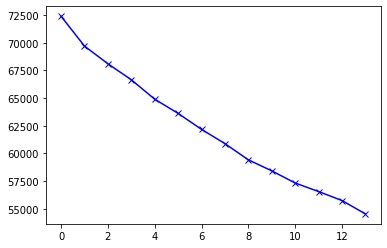

In [ ]:
cost = []
for i in range(1,15):
  kmean = KMeans(i*20)
  kmean.fit(carts01)
  cost.append(kmean.inertia_)
  print("Готово разбиение на ", i*20, " классов", sep="")
    
plt.plot(cost, 'bx-')

In [ ]:
# Разбиение на 280 классов
for clusterNumber in range(max(labels)):                     # Пробегаем по всем значениям
    if (clusterSize[clusterNumber] > 5):                     # Если размер кластера больше 5
      pos, posVal = getCluster(carts01[labels==clusterNumber]) # Получаем позиции и их количество в текущем кластере
      print("Покупок:", clusterSize[clusterNumber])            # Выводим размер текущего кластера
      print("Позиций:", len(pos))                              # Выводим общее число позиций в текущем кластере
      pos = np.array(pos)                                      # Преобразуем в numpy
      posVal = np.array(posVal)                                # Преобразуем в numpy
      indexes = posVal > 0.2                                   # Берем индексы тех позиций, доля которых составляет больше 20%
      indexedPos = pos[indexes]                                # Выбираем эти позиции из pos
      indexedPosVal = posVal[indexes]                          # Выбираем доли этих позиций

      # Отображаем долю позиции и название самой позиции
      for i in range(len(indexedPos)):
        print(round(100*indexedPosVal[i]), "% ", indexedPos[i], sep="")

      print()
      print()

Покупок: 20
Позиций: 110
25.0% ["Кисть для бровей скошенная Lucas' Cosmetics (средняя)"]
40.0% ['Масло Brow oil для бровей и ресниц, 15 мл']
65.0% ['Обезжириватель для бровей Brow Primer, 50 мл']
45.0% ['Паста для бровей Brow Paste by CC Brow, 15 гр']
40.0% ['Скраб для бровей Brow Scrub, 100 мл']
60.0% ['Стаканчик (5мл) стеклянный для разведения хны']
50.0% ['Услуга доставки СДЭК']
30.0% ['Хна для бровей CC Brow (black) в саше (черный), 5 гр']
45.0% ['Хна для бровей CC Brow (brown) в саше (коричневый), 5 гр']
25.0% ['Хна для бровей CC Brow (dark brown) в баночке (темно-коричневый), 5 гр']
35.0% ['Хна для бровей CC Brow (dark brown) в саше (темно-коричневый), 5 гр']
50.0% ['Хна для бровей CC Brow (grey brown) в саше (серо-коричневый), 5 гр']
30.0% ['Шампунь для бровей Brow Shampoo by CC Brow, 50 мл']


Покупок: 2951
Позиций: 3297
100.0% ['Услуга доставки Почта России']


Покупок: 257
Позиций: 812
29.0% ['Оксигент 3% 60 мл DE LUXE']
99.0% ['Оксигент 6% 60 мл DE LUXE']
23.0% ['Пудра  для 